# Exam Analysis of Germany IT Operative Professionals in a Bavarian Training Center

## Situation

**Motivation:** 
As a trainer of aspiring IT Specialists who want to become IT Operative Professionals in Germany, I'm interested on the insights that can be gained solely by looking at exam grades. 

**Data Set:**
The data set provides anonymized exam grades of students who want to become a IT Operative Professional in Germany. The data was provided by a training center in Bavaria, Germany where I thought classes between 2017 and 2020. The data set contains grades of one year from Q4 2017 till Q3 2018.

**Methodology:** 
The analysis is based on the cross-industry process for data mining (CRISP-DM). This six-phase process provides a structured approach to planning and realizing a data mining project. Those six phases are:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

This Jupyter notebook can be found on GitHub (https://github.com/fsteppich/UD-DS-ExamGradeAnalysis)

The accompanying blog post can be found on my GitHub page (https://fsteppich.github.io/blog/20200304-UD-DS-ExamGradeAnalysis)

## 1. Business Understanding

The training required in Germany to become a IT Operative Professional prepares the student to get a job in the middle management. In comparison to IT Specialists, IT Operative Professionals need to handle an extended area of accountability and responsibility.  

To succeed in the training, the student is required to pass four exams. Those are a Foundation, Information Security, Documentation and a Lab Exam. The Foundation Exam covers the basics of Computer Networking, Linux, Windows Server and Cisco Routing and Switching. The Information Security Exam covers the German Privacy Protection Law (Datenschutzgrundverordnung, DGVO) and related documents, different malware and attack vectors used by cyber criminals and the use of security appliances. The Documentation Exam covers detailed requirements that apply to network and organizational documentations. The Lab Exam is a hands-on exam where the student needs to put the theory to practice and build a small company network. 

Failing the final Lab Exam or any combination of two of the other three exams requires the trainee to quit the training. 

As trainer, we used to entertain us by guessing the grades a certain student is likely to earn in the final Lab Exam. Many used to guess the Lab Exam grade by looking at the Documentation Exam grade. We assumed the similarity between the content of those exams might be the reason why the grades are similar. To put this heuristic to the test, I decided to analyze the data. 

In order to gain deeper insight into the exam grading, I am particularly interested in the answers to the following questions: 

1. Which exam is the easiest (highest number of passing students and best average grade)? 
2. Which exam correlates the most with the Lab Exam grade? 
3. Is it possible to predict the grade in the Lab Exam based on other grades? 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re # RegEx
import math

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns

%matplotlib inline

## 2. Data Understanding

In this section I am going to build a basic understanding of the provided data and quality thereof. Quality issues will be handled in this phase.

Next, I will load the data set and print some basic statistics.

In [184]:
df = pd.read_csv('./exam_grades_it_op_pro_dataset.csv.csv')

def print_null_value_analysis(df) :
    print("-"*80)
    print("Missing / null values\n")
    isnull_sums = df.isnull().sum()
    for col,null_sum in isnull_sums.iteritems():
        percent = round((null_sum * 100 / df[col].index.size),3)
        print("{:8}{:22}{:4} ({:6}%)".format(str(df[col].dtype), col, null_sum, percent))
    print("-"*80, "\n")

print("-"*80)
print("Basic DataFrame information\n")
print(df.info())
print("-"*80, "\n")

print("-"*80)
print("First few lines of the DataFrame\n")
print(df.head())
print("-"*80, "\n")

print_null_value_analysis(df)

--------------------------------------------------------------------------------
Basic DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Class                  992 non-null    int64  
 1   Year                   992 non-null    int64  
 2   Quarter                992 non-null    int64  
 3   Student                992 non-null    int64  
 4   Experience             656 non-null    object 
 5   Exam                   992 non-null    object 
 6   Grading1/Points        932 non-null    float64
 7   Grading1/Percent       932 non-null    float64
 8   Grading1/Grade         932 non-null    float64
 9   Grading2/Points        896 non-null    object 
 10  Grading2/Percent       896 non-null    object 
 11  Grading2/Grade         896 non-null    object 
 12  GradingCombined/Grade  921 non-null    object 
dtype

There are approx. 6% missing values in all three **Grading1/...** columns. Next, I am going to look at those columns.

In [185]:
df[df['Grading1/Points'].isna() == True]

,Class,Year,Quarter,Student,Experience,Exam,Grading1/Points,Grading1/Percent,Grading1/Grade,Grading2/Points,Grading2/Percent,Grading2/Grade,GradingCombined/Grade
704,29,2018,4,1,3+,InfoSecExam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,29,2018,4,2,3+,InfoSecExam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706,29,2018,4,3,3+,InfoSecExam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
707,29,2018,4,4,3+,InfoSecExam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
708,29,2018,4,5,3+,InfoSecExam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
709,29,2018,4,6,3+,InfoSecExam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,29,2018,4,7,3+,InfoSecExam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
711,29,2018,4,8,3+,InfoSecExam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712,29,2018,4,9,3+,InfoSecExam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
713,29,2018,4,10,3+,InfoSecExam,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This output tells me, that class 29 has no grades assigned to students of the 4th quarter of 2018. Therefore, it is best to drop all of these rows. 

In [186]:
df = df.dropna(subset=['Grading1/Points'])

Let's look again at the rest of the missing values.

In [187]:
print_null_value_analysis(df)

--------------------------------------------------------------------------------
Missing / null values

int64   Class                    0 (   0.0%)
int64   Year                     0 (   0.0%)
int64   Quarter                  0 (   0.0%)
int64   Student                  0 (   0.0%)
object  Experience             336 (36.052%)
object  Exam                     0 (   0.0%)
float64 Grading1/Points          0 (   0.0%)
float64 Grading1/Percent         0 (   0.0%)
float64 Grading1/Grade           0 (   0.0%)
object  Grading2/Points         36 ( 3.863%)
object  Grading2/Percent        36 ( 3.863%)
object  Grading2/Grade          36 ( 3.863%)
object  GradingCombined/Grade   11 (  1.18%)
-------------------------------------------------------------------------------- 



Let's find all the values that are not numeric value as a string.

In [188]:
FLOAT_REGEX = re.compile('[+-]{0,1}\d*[.]{0,1}\d*') 
GRADING2_COLUMNS = ['Grading2/Grade', 'Grading2/Percent', 'Grading2/Points']

def check_numeric_or_nan(x):
    if( FLOAT_REGEX.fullmatch(str(x))!=None ) :
        return True
#    if( isinstance(x, str) ) :
#        return False
#    if( x != None and math.isnan(x) ) :
#        return True
#    return False

def print_numeric_column_analysis(df, col_name) :
    print("-"*80)
    print("Printing numeric column analysis for column {}\n".format(col_name))
    print("Types in column")
    print(df[col_name].apply(lambda x: type(x)).value_counts())
    print()

    print("Strings matching numeric regex in column")
    #print(df['Grading2/Percent'].apply(lambda x: type(x)).value_counts())
    print(df[col_name].apply(lambda x: floatRegex.fullmatch(str(x))!=None).value_counts())
    print()

    print("Rows with strings not matching numeric regex or NaN in column", col_name)
    print(df[df[col_name].apply(lambda x : not check_numeric_or_nan(x))])
    print("-"*80, "\n")
    
for col_name in GRADING2_COLUMNS :
    print_numeric_column_analysis(df, col_name)

--------------------------------------------------------------------------------
Printing numeric column analysis for column Grading2/Grade

Types in column
<class 'str'>      896
<class 'float'>     36
Name: Grading2/Grade, dtype: int64

Strings matching numeric regex in column
True     886
False     46
Name: Grading2/Grade, dtype: int64

Rows with strings not matching numeric regex or NaN in column Grading2/Grade
     Class  Year  Quarter  Student Experience               Exam  \
36      25  2017        4        1        NaN  DocumentationExam   
37      25  2017        4        2        NaN  DocumentationExam   
38      25  2017        4        3        NaN  DocumentationExam   
84      25  2018        1        1        NaN  DocumentationExam   
85      25  2018        1        2        NaN  DocumentationExam   
86      25  2018        1        3        NaN  DocumentationExam   
111     25  2018        2        1        NaN            LabExam   
112     25  2018        2        2   

All the missing or malformed values in the **Grading2/...** columns can be imputed by copying the values from the corresponding **Gradeing1/...** columns. The reason, why some values are missing is due to a lack of personal that can grade an exam. This means, sometimes there is only one grading. Let's impute these values.

In [189]:
def normalise_grading_by_copying(row, source_col, target_col):
    if not check_numeric_or_nan(row[target_col]) :
        return row[source_col]
    return row[target_col]

df['Grading2/Points'] = df.apply(lambda row : normalise_grading_by_copying(row, 'Grading1/Points', 'Grading2/Points'), axis=1) 
df['Grading2/Percent'] = df.apply(lambda row : normalise_grading_by_copying(row, 'Grading1/Percent', 'Grading2/Percent'), axis=1) 
df['Grading2/Grade'] = df.apply(lambda row : normalise_grading_by_copying(row, 'Grading1/Grade', 'Grading2/Grade'), axis=1) 

for col_name in GRADING2_COLUMNS :
    df[col_name] = pd.to_numeric(df[col_name])

Run the column analysis again to verify that all columns got cleaned and converted to float types.

In [190]:
for col_name in GRADING2_COLUMNS :
    print_numeric_column_analysis(df, col_name)

--------------------------------------------------------------------------------
Printing numeric column analysis for column Grading2/Grade

Types in column
<class 'float'>    932
Name: Grading2/Grade, dtype: int64

Strings matching numeric regex in column
True    932
Name: Grading2/Grade, dtype: int64

Rows with strings not matching numeric regex or NaN in column Grading2/Grade
Empty DataFrame
Columns: [Class, Year, Quarter, Student, Experience, Exam, Grading1/Points, Grading1/Percent, Grading1/Grade, Grading2/Points, Grading2/Percent, Grading2/Grade, GradingCombined/Grade]
Index: []
-------------------------------------------------------------------------------- 

--------------------------------------------------------------------------------
Printing numeric column analysis for column Grading2/Percent

Types in column
<class 'float'>    932
Name: Grading2/Percent, dtype: int64

Strings matching numeric regex in column
True    932
Name: Grading2/Percent, dtype: int64

Rows with stri

Analyze the DataFrame again to see how many values are still missing.

In [191]:
print_null_value_analysis(df)

--------------------------------------------------------------------------------
Missing / null values

int64   Class                    0 (   0.0%)
int64   Year                     0 (   0.0%)
int64   Quarter                  0 (   0.0%)
int64   Student                  0 (   0.0%)
object  Experience             336 (36.052%)
object  Exam                     0 (   0.0%)
float64 Grading1/Points          0 (   0.0%)
float64 Grading1/Percent         0 (   0.0%)
float64 Grading1/Grade           0 (   0.0%)
float64 Grading2/Points          0 (   0.0%)
float64 Grading2/Percent         0 (   0.0%)
float64 Grading2/Grade           0 (   0.0%)
object  GradingCombined/Grade   11 (  1.18%)
-------------------------------------------------------------------------------- 



The **GradingCombined/Grade** column still has some missing or malformed values. To clean these, I will take a similar approach as with the **Grading2/...** columns.

In [192]:
print_numeric_column_analysis(df, 'GradingCombined/Grade')

--------------------------------------------------------------------------------
Printing numeric column analysis for column GradingCombined/Grade

Types in column
<class 'str'>      921
<class 'float'>     11
Name: GradingCombined/Grade, dtype: int64

Strings matching numeric regex in column
True     916
False     16
Name: GradingCombined/Grade, dtype: int64

Rows with strings not matching numeric regex or NaN in column GradingCombined/Grade
     Class  Year  Quarter  Student Experience               Exam  \
36      25  2017        4        1        NaN  DocumentationExam   
37      25  2017        4        2        NaN  DocumentationExam   
38      25  2017        4        3        NaN  DocumentationExam   
84      25  2018        1        1        NaN  DocumentationExam   
85      25  2018        1        2        NaN  DocumentationExam   
86      25  2018        1        3        NaN  DocumentationExam   
480     29  2017        2        1         3+  DocumentationExam   
481     2

The **GradingCombined/Grad** column has the same issues as the **Grading2/...** columns. Therefore, I will impute the values by calculate the arithmetic mean of the **Grading1/Grade** and **Grading2/Grade** column. This is the common arithmetic used in the training center.

In [193]:
def normalise_grading_combined(row):
    if not check_numeric_or_nan(row['GradingCombined/Grade']) :
        return (row['Grading1/Grade'] + row['Grading2/Grade'])/2
    return row['GradingCombined/Grade']

df['GradingCombined/Grade'] = df.apply(lambda row : normalise_grading_combined(row), axis=1) 
df['GradingCombined/Grade'] = pd.to_numeric(df['GradingCombined/Grade'])

print_numeric_column_analysis(df, 'GradingCombined/Grade')

--------------------------------------------------------------------------------
Printing numeric column analysis for column GradingCombined/Grade

Types in column
<class 'float'>    932
Name: GradingCombined/Grade, dtype: int64

Strings matching numeric regex in column
True    932
Name: GradingCombined/Grade, dtype: int64

Rows with strings not matching numeric regex or NaN in column GradingCombined/Grade
Empty DataFrame
Columns: [Class, Year, Quarter, Student, Experience, Exam, Grading1/Points, Grading1/Percent, Grading1/Grade, Grading2/Points, Grading2/Percent, Grading2/Grade, GradingCombined/Grade]
Index: []
-------------------------------------------------------------------------------- 



### Summary after analyzing and cleaning the dataset
Column **Experience** shows the years of experience a trainee has. This column uses a categorical scale.  

Few rows had missing values in all **Grading...** columns. Those rows are of no use in the present analysis. Therefore, I dropped them. 

The **Grading2/...** columns had some missing or malformed values that where imputed based on the **Grading1/...** columns. This was a safe way as these grades did not get assigned due to a lack of assessing personal. 

Column **GradingCombined/Grade** also had some missing or malformed values. These values got imputed by using the common arithmetic (arithmetic mean) used by the training center. 

## 3. Data Preparation

In this phase of CRISP-DM I am going to prepare the data set to form a basis to answer the first two stated questions. Additionally, I will further prepare the data set to perform the modeling in the following CRISP-DM phase.

Most of the procedures to handle missing values where already performed in the previous section *2. Data Understanding*.

### 3.1. Question 1 / 3
*Which exam is the easiest to pass?*

### 3.1.1. Preparation for Question 1 / 3
This means, which exam has the highest number of passing students and which has the lowest average grading. Grading is performed on an ordinal scale from 1 (very well) to 6 (insufficient). An exam is consider not passed if it is graded with a 5 or 6.

First, I will extract the relevant subset of columns from the imported DataFrame by building a student id, simplified grade and the exam name. The student id is intended to uniquely identify a student and based on year, quarter, class, and student number. The simplified grade spans the integer values from 1 to 6. Gradings of the **GradingCombined/Grade** column will be mapped to an integer value according to the exam guide of the training center. Finally, the column **Exam** simply gets copied.

In [255]:
exam_list = df['Exam'].unique()
print("Available exams: {}".format(str(exam_list)))

# Create a Studend ID by combining columns
def student_id_from_yqcs(row) :
    return "{}-{}-{}-{}".format(row['Year'], row['Quarter'], row['Class'], row['Student'])

def grade_from_grading(row, source_grade_column) :
    source_grade = row[source_grade_column]
    if( 0 <= source_grade and source_grade <= 1.495 ) :
        return 1
    elif( 1.495 < source_grade and source_grade <= 2.495 ) :
        return 2
    elif( 2.495 < source_grade and source_grade <= 3.495 ) :
        return 3
    elif( 3.495 < source_grade and source_grade <= 4.495 ) :
        return 4
    elif( 4.495 < source_grade and source_grade <= 5.495 ) :
        return 5
    else : # 5.495 < source_grade
        return 6

    
student_series = df.apply(lambda row: student_id_from_yqcs(row), axis=1)
grade_series = df.apply(lambda row: grade_from_grading(row, 'GradingCombined/Grade'), axis=1)

df_seg = pd.DataFrame({'Student': student_series,\
                'Exam': df['Exam'],\
                'Grade': grade_series} )

df_seg

Available exams: ['InfoSecExam' 'LabExam' 'FoundationExam' 'DocumentationExam']


,Student,Exam,Grade
0,2017-4-25-1,InfoSecExam,4
1,2017-4-25-2,InfoSecExam,3
2,2017-4-25-3,InfoSecExam,2
3,2017-4-25-4,InfoSecExam,2
4,2017-4-25-5,InfoSecExam,2
...,...,...,...
987,2018-3-32-11,DocumentationExam,3
988,2018-3-32-12,DocumentationExam,1
989,2018-3-32-13,DocumentationExam,2
990,2018-3-32-14,DocumentationExam,1


Next, I calculate the grade statistics of each exam to allow a comparison.

In [256]:
def print_exam_statistics(df, exam) :
    print("-"*80)
    print("Printing {} statistics".format(exam))
    print()
    df_exam = df[df['Exam'] == exam]
    exam_grade_counts = df_exam['Grade'].value_counts().sort_index()

    print("Grade | Freq. | Rel. Freq.")
    print("------|-------|-----------")
    for grade,count in exam_grade_counts.iteritems():
        percent = round((count * 100 / df_exam.shape[0]), 3)
        print("{:5} |{:6} | {:6} %".format(grade, count, percent))
    print("--------------------------")
    
    not_passed_count = 0
    if (5 in exam_grade_counts.index) :
        not_passed_count += exam_grade_counts[5]
    if (6 in exam_grade_counts.index) :
        not_passed_count += exam_grade_counts[6]
    
    not_passed_count_percent = round((not_passed_count * 100 / df_exam.shape[0]), 3)
    print("Not passed: {} ({} %)".format(not_passed_count, not_passed_count_percent))
    print("Avg. Grade: {}".format(df_exam['Grade'].mean()))
    print()

for exam in exam_list :
    print_exam_statistics(df_seg, exam)

--------------------------------------------------------------------------------
Printing InfoSecExam statistics

Grade | Freq. | Rel. Freq.
------|-------|-----------
    1 |     8 |  3.433 %
    2 |    55 | 23.605 %
    3 |    96 | 41.202 %
    4 |    58 | 24.893 %
    5 |    16 |  6.867 %
--------------------------
Not passed: 16 (6.867 %)
Avg. Grade: 3.0815450643776825

--------------------------------------------------------------------------------
Printing LabExam statistics

Grade | Freq. | Rel. Freq.
------|-------|-----------
    1 |    44 | 18.884 %
    2 |    50 | 21.459 %
    3 |    61 |  26.18 %
    4 |    58 | 24.893 %
    5 |    16 |  6.867 %
    6 |     4 |  1.717 %
--------------------------
Not passed: 20 (8.584 %)
Avg. Grade: 2.8454935622317596

--------------------------------------------------------------------------------
Printing FoundationExam statistics

Grade | Freq. | Rel. Freq.
------|-------|-----------
    1 |     3 |  1.288 %
    2 |    46 | 19.742 %
    

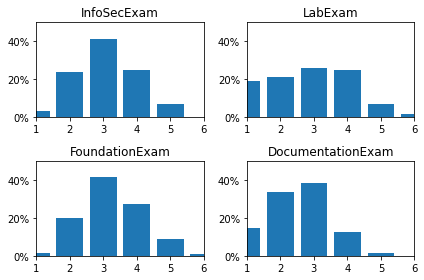

In [408]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, tight_layout=True)

def plot_grade_distribution(df, axis, exam) :
    df_exam = df[df['Exam'] == exam]
    exam_grade_counts = df_exam['Grade'].value_counts().sort_index()
    axis.bar(exam_grade_counts.index, exam_grade_counts.values / df_exam.shape[0], align='center')
    axis.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    axis.set_xbound(1, 6)
    axis.set_ybound(0, .5)
    axis.set_title(exam)
    
plot_grade_distribution(df_seg, axs[0][0], exam_list[0])
plot_grade_distribution(df_seg, axs[0][1], exam_list[1])
plot_grade_distribution(df_seg, axs[1][0], exam_list[2])
plot_grade_distribution(df_seg, axs[1][1], exam_list[3])


### 3.1.1. Answer for Question 1 / 3

*Which exam is the easiest to pass?*

* Best average grade (*2.524*) received on the **Documentation Exam**
* Least number of students (*1.288%*) failed the **Documentation Exam**
* Greatest number of students (*3.258%*) failed the **Foundation Exam**

With these results it seems that the *Documentation Exam* is the easiest of the four exams.

### 3.2. Question 2 / 3
*What exam correlates the most with the Lab Exam?*

### 3.2.1. Preparation for Question 2 / 3
To answer this question, I will build a DataFrame only containing the combined grades. Visualize the correlation matrix of this DataFrame and verify the correlation by generating scatter plots of the two strongest correlations.

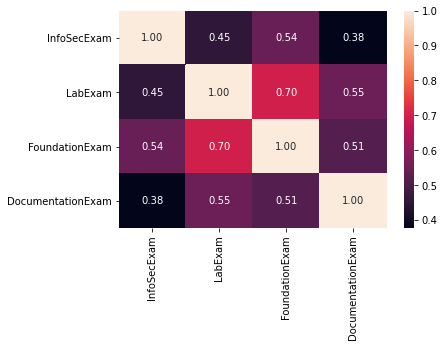

In [277]:
def exam_grades_from_df(df, exam) :
    return df[df['Exam']==exam].apply(lambda row: grade_from_grading(row, 'GradingCombined/Grade'), axis=1).values

df_grades = pd.DataFrame()
for exam in exam_list :
    df_grades[exam] = exam_grades_from_df(df, exam)

sns.heatmap(df_grades.corr(), annot=True, fmt=".2f");

Let's see how the two strongest (positive) correlations look like in the scatter plot.

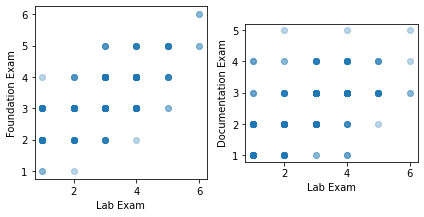

In [296]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.scatter(df_grades['LabExam'].values, df_grades['FoundationExam'].values,  alpha=0.3) # s=area, c=colors,
ax.set_xlabel('Lab Exam')
ax.set_ylabel('Foundation Exam')
ax.set_aspect(1)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df_grades['LabExam'].values, df_grades['DocumentationExam'].values,  alpha=0.3) # s=area, c=colors,
ax.set_xlabel('Lab Exam')
ax.set_ylabel('Documentation Exam')
ax.set_aspect(1)

fig.tight_layout()

### 3.2.2. Answer for Question 2 / 3

*Which exam correlates the most with the Lab Exam?*

* Highest correlation (*.70*) exists between **Foundation Exam** and **Lab Exam**
* 2nd highest correlation (*.55*) exists between **Documentation Exam** and **Lab Exam**

These results refute the assertion that there is a strong correlation between the Documentation Exam and Lab Exam. The scatter plot shows the same as the correlation of *.70* suggests: the data point lay more on a diagonal line.

## 4. Modeling

In this CRISP-DM phase I am going to build a (predictive) model to answer the third question:

### 4.1. Question 3 / 3 
*Is it possible to predict the grade in the Lab Exam based on other grades?*

I will re-use the DataFrame from the previous question and add the categorical column **Experience** as a set of dummy columns.

The answer of question 2 indicated a linear relation of the Lab Exam and the Foundation Exam grades. Therefore, I am going to use a linear model to predict the Lab Exam grades as this is the simplest assumtion. As an alternative I will build a second model based on decision trees (RandomForestRegressor).

In [348]:
def create_dummy_columns(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols :
        try :
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], dummy_na=dummy_na, prefix=col, prefix_sep='_', drop_first=False)], axis=1)
        except :
            continue
    
    return df

df_modeling = df_grades.copy()
df_modeling['Experience'] = df[df['Exam']=='LabExam']['Experience'].values

print("Number of different Experience values: ")
experience_counts = df_modeling['Experience'].value_counts()
print("Value | Freq. | Rel. Freq.")
print("------|-------|-----------")
for value,count in experience_counts.iteritems():
    percent = round((count * 100 / df_modeling.shape[0]), 3)
    print("{:5} |{:6} | {:6} %".format(value, count, percent))
print("--------------------------")

df_modeling = create_dummy_columns(df_modeling, ['Experience'], dummy_na=True)
df_modeling


Number of different Experience values: 
Value | Freq. | Rel. Freq.
------|-------|-----------
3+    |   140 | 60.086 %
6+    |     9 |  3.863 %
--------------------------


,InfoSecExam,LabExam,FoundationExam,DocumentationExam,Experience_3+,Experience_6+,Experience_nan
0,4,5,5,3,0,0,1
1,3,3,3,2,0,0,1
2,2,2,2,2,0,0,1
3,2,1,3,4,0,0,1
4,2,1,2,2,0,0,1
...,...,...,...,...,...,...,...
228,4,3,5,3,1,0,0
229,3,1,2,1,1,0,0
230,4,2,2,2,1,0,0
231,2,1,2,1,1,0,0


Most of the students (~60%) have less then 6 years of experience in the IT profession. This indicates that the experience might not be a significant feature in predicting any grades. Therefore, I am going to ignore more and more features to see if those ignored columns made the model better or worse.

In [377]:
def fit_model(df, target_column, drop_columns = [], test_size=.30, random_state=None, model_name='LinearRegression') :
    drop_columns = drop_columns.copy()
    drop_columns.append(target_column)
    X = df.drop(drop_columns, axis=1)
    y = df[target_column]
    
    if( random_state != None ) :
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state)
    else :
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
    
    if( model_name != None and model_name.lower() == 'RandomForestRegressor'.lower() ) :
        if( random_state != None ) :
            model = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=random_state)
        else :
            model = RandomForestRegressor(n_estimators=100, criterion='mse')
    elif( model_name != None and model_name.lower() == 'LinearRegression'.lower() ) :
        if( random_state != None ) :
            model = LinearRegression(normalize=True, random_state=random_state)
        else :
            model = LinearRegression(normalize=True)
    else :
            raise ValueError('model_name {} not supported. Choose one of: \'LinearRegression\', \'RandomForestRegressor\''.format(model_name))
        
    model.fit(X_train, y_train)
    
    y_test_pred = model.predict(X_test)
    test_score = r2_score(y_test, y_test_pred)
    
    y_train_pred = model.predict(X_train)
    train_score = r2_score(y_train, y_train_pred)
    
    return {'test': test_score, 'train': train_score}

def avg_scores(df, target_column, drop_columns = [], model_name='LinearRegression') :
    print("-"*60)
    print("Printing avg. r2 scores of {}\n(<all cols> - {}) -> {}".format(model_name, drop_columns, target_column))
    print()
    test_score_cum = 0
    train_score_cum = 0
    no_of_fits = 50
    for i in range(no_of_fits) :
        scores = fit_model(df, target_column, drop_columns, model_name=model_name)
        test_score_cum += scores['test']
        train_score_cum += scores['train']
        
    print("Avg. scores ")
    print("test:  {:6.05}".format(test_score_cum / no_of_fits))
    print("train: {:6.05}".format(train_score_cum / no_of_fits))
    print()

for model_name in ['LinearRegression', 'RandomForestRegressor'] :
    print("-"*80)
    print("Evaluating {}".format(model_name))
    print()
    avg_scores(df_modeling, 'LabExam', model_name=model_name)
    avg_scores(df_modeling, 'LabExam', ['Experience_3+', 'Experience_6+', 'Experience_nan'], model_name=model_name)
    avg_scores(df_modeling, 'LabExam', ['InfoSecExam', 'DocumentationExam','Experience_3+', 'Experience_6+', 'Experience_nan'], model_name=model_name)
    
print("-"*80)
print("Evaluation of models done")

--------------------------------------------------------------------------------
Evaluating LinearRegression

------------------------------------------------------------
Printing avg. r2 scores of LinearRegression
(<all cols> - []) -> LabExam

Avg. scores 
test:  0.50729
train: 0.53791

------------------------------------------------------------
Printing avg. r2 scores of LinearRegression
(<all cols> - ['Experience_3+', 'Experience_6+', 'Experience_nan']) -> LabExam

Avg. scores 
test:  0.51554
train: 0.53862

------------------------------------------------------------
Printing avg. r2 scores of LinearRegression
(<all cols> - ['InfoSecExam', 'DocumentationExam', 'Experience_3+', 'Experience_6+', 'Experience_nan']) -> LabExam

Avg. scores 
test:  0.45933
train: 0.48846

--------------------------------------------------------------------------------
Evaluating RandomForestRegressor

------------------------------------------------------------
Printing avg. r2 scores of RandomForestRe

## 5. Evaluation

### 5.1 Answer for Question 3 / 3
*Is it possible to predict the grade in the Lab Exam based on other grades?*

Let's take a look at the evaluation results of the LinearRegression model. This model performed best the **Experience...** columns where ignored. Ignoring more columns and using only the **FoundationExam** column worsened the scores.

The model generated by the RandomForestRegressor performed best when only the **FoundationExam** column was used. 

Comparing both models, the **linear model** (r2 score 0.51554) **performed slightly better** than the decision tree model (r2 score 0.46748). Therefore, it is possible to predict the Lab Exam grade with an linear model using all the other grades.

## 6. Deployment

The answers found in this notebook got presented in an internal meeting with the staff of the training center.

Furthermore, these answers got published in a blog post that can be found here: https://fsteppich.github.io/blog/20200304-UD-DS-ExamGradeAnalysis

Finally let's summarize this notebook.
    
## Summery

### Question 1: Which exam is the easiest to pass?
**Answer**

With these results it seems that the *Documentation Exam* is the easiest of the four exams with an average grade of *2.524* and only *1.288%* failing students.

### Question 2: Which exam correlates the most with the Lab Exam?
**Answer**

The strongest correlation exits between the **Foundation Exam** and the **Lab Exam**. 

### Question 3: Is it possible to predict the grade in the Lab Exam based on other grades?
**Answer**

It is best to predict the Lab Exam grade with a linear model using all the other exam grades.

## Final notes
This analysis was done as a project within the Udacity Data Science Nanodegree. Any feedback that helps me to improve this analysis is welcome.

You can find me on LinkedIn: https://www.linkedin.com/in/fst/ 

This Jupyter notebook can be found on GitHub (https://github.com/fsteppich/UD-DS-ExamGradeAnalysis)

The accompanying blog post can be found on my GitHub page (https://fsteppich.github.io/blog/20200304-UD-DS-ExamGradeAnalysis)
